In [4]:
import sys  
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib_inline
import matplotlib as mpl
from ipywidgets import interact

sys.path.insert(0, '../../')
from mystatlearn.regression import BSplineRegression
from mystatlearn.interpolation import BSpline
from mystatlearn.visualise import plotly_widgets, setup_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2
setup_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# B-splines

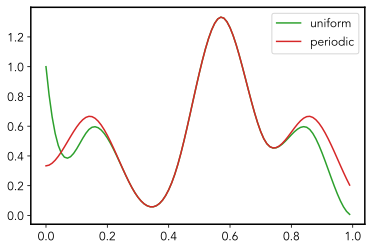

In [5]:
n = 10
p = 3
controls = np.array([1, 0, 1, 0, 0, 2, 0, 1, 0 ,0])
uniform_bspline = BSpline(p, n=n, type='uniform', controls=controls)
periodic_bspline = BSpline(p, n=n, type='periodic', controls=controls)

X = np.linspace(0, 0.99,  100)
y_u = uniform_bspline.interpolate(X)
y_p = periodic_bspline.interpolate(X)
plt.plot(X, y_u, label='uniform', color='C2')
plt.plot(X, y_p, label='periodic', color='C3')
plt.legend()
plt.show()

## B-splines curve fitting

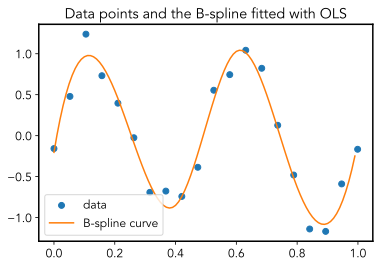

In [6]:
# generate the data
m = 20
X = np.linspace(0, 0.999, m)
y = np.sin(4 * X * np.pi) + norm.rvs(size=m, loc=0, scale=0.2)

# set the B-spline parameters
n = 8  # number of control points
p = 3  # degree of the curves

# fit the model
model = BSplineRegression(p=p, n=n, type='periodic')
y_fit = model.fit_transform(X, y)
x_axs = np.linspace(0, 0.99, 100)
y_pred = model.predict(x_axs)

# plot the results
fig, ax  = plt.subplots()
ax.scatter(X, y, label = 'data')
ax.plot(x_axs, y_pred, color='C1', label='B-spline curve')
ax.legend()
ax.set_title("Data points and the B-spline fitted with OLS")
plt.show()

In [7]:
# generate the data
m = 15
X = np.linspace(0, 1, m, endpoint=False)
y = 4 * np.sin((X * np.pi) ** 2) + norm.rvs(size=m, loc=0, scale=1)
xs = np.linspace(0, 1, 100, endpoint=False)

# create plotly figure
fig = plotly_widgets(
    X, y, xs, title='B-splines curve fitting', scatter_name='fitted B-spline')
@interact(n=(5, 10, 1), p=(0, 4, 1), type=['uniform', 'periodic'])
def update(n=6, p=3, type='uniform'):
    with fig.batch_update():
        model = BSplineRegression(p=p, n=n, type=type)
        model.fit(X, y)
        x_axs = np.linspace(0, 0.99, 100)
        y_pred = model.predict(x_axs)
        fig.data[0].x=xs
        fig.data[0].y=y_pred
fig

interactive(children=(IntSlider(value=6, description='n', max=10, min=5), IntSlider(value=3, description='p', …

FigureWidget({
    'data': [{'line': {'color': '#ff7f0e'},
              'name': 'fitted B-spline',
          …